<a href="https://colab.research.google.com/github/aditipatil0711/SJSU_Masters_Assignments/blob/main/CMPE255_Data_Mining/Assignment8/SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing SVD

Dataset Used: Real-time Patient Data with Oxygen Demand on Kaggle

### Step 1: Understanding SVD

- **Definition**: SVD is a matrix factorization technique that decomposes a matrix into three other matrices, often referred to as U, Σ (Sigma), and V^T (transpose of V).
- **Applications**: It's widely used for noise reduction, image compression, and most notably, in recommendation systems.

### Step 2: Setting Up the Environment

- We will use Python libraries such as NumPy, pandas, and scipy.linalg (for SVD).

### Step 3: Loading the Data

- We will use the Social Networks Ads dataset. The data will be loaded into a DataFrame for manipulation and analysis.

### Step 4: Preprocessing

- SVD requires numerical data. We'll convert any categorical data to numerical and handle missing values if necessary.
- We'll also standardize or normalize the data as required for SVD.

### Step 5: Applying SVD

- We'll decompose the dataset using SVD and explore the singular values.
- We'll discuss the selection of singular values (dimensionality reduction).


In [ ]:
import pandas as pd
import os
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Oxygen_Dataset.zip to Oxygen_Dataset.zip




### Next Steps:

1. **Load the Dataset**: We will load "Oxygen Dataset Final.csv" into a pandas DataFrame for analysis.
2. **Initial Data Exploration**: Examine the dataset to understand its structure, including checking for missing values and the types of variables present.


In [ ]:
import pandas as pd
import numpy as np
from scipy.linalg import svd
import zipfile
import os

# Extracting the zip file containing the new dataset
oxygen_zip_path = '/content/Oxygen_Dataset.zip'

# Extracting the zip file
with zipfile.ZipFile(oxygen_zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content")

# Finding the extracted file(s)
extracted_oxygen_files = os.listdir("/content")
extracted_oxygen_csv_files = [file for file in extracted_oxygen_files if file.endswith('.csv')]

# Displaying the names of extracted files
extracted_oxygen_csv_files


['Oxygen Dataset Final.csv']

In [ ]:
# Loading the Oxygen Dataset
oxygen_file_path = '/content/Oxygen Dataset Final.csv'
df_oxygen = pd.read_csv(oxygen_file_path)

# Initial Data Exploration
# Displaying the first few rows of the dataframe to understand its structure
oxygen_head = df_oxygen.head()

# Basic Descriptive Statistics
descriptive_stats_oxygen = df_oxygen.describe()

# Checking for Missing Values
missing_values_oxygen = df_oxygen.isnull().sum()

# Displaying the initial exploration results
oxygen_head, descriptive_stats_oxygen, missing_values_oxygen


(   age  gender  spo2     pr  c/nc  oxy_flow
 0   27       0  74.0   72.0   1.0       6.0
 1   53       1   NaN  110.0   NaN      28.0
 2   56       0  99.0   98.0   1.0       NaN
 3   26       1   NaN  110.0   1.0       4.0
 4   52       0  69.0   84.0   1.0       0.0,
                  age         gender           spo2             pr  \
 count  200000.000000  200000.000000  173755.000000  167616.000000   
 mean       46.259365       0.369110      88.149809      92.570990   
 std        21.789486       0.482565      15.806494      15.982894   
 min        17.000000       0.000000      35.000000      40.000000   
 25%        28.000000       0.000000      83.000000      82.000000   
 50%        44.000000       0.000000      96.000000      96.000000   
 75%        62.000000       1.000000      99.000000     107.000000   
 max       100.000000       1.000000      99.000000     110.000000   
 
                 c/nc       oxy_flow  
 count  173558.000000  162253.000000  
 mean        0.7822


# Next Steps:

1. **Data Preprocessing**:
   - Address missing values. Options include filling them with mean/median values or dropping rows/columns with missing values.
   - Standardize the numerical features. This is important because SVD is sensitive to the scale of the data.

2. **Applying SVD**:
   - After preprocessing, we will apply SVD to the dataset.
   - We'll analyze the singular values and discuss how they can be used for dimensionality reduction.


In [ ]:
# Data Preprocessing
import numpy as np
from sklearn.preprocessing import StandardScaler

# Handling missing values by filling them with the mean (for simplicity)
df_oxygen_filled = df_oxygen.fillna(df_oxygen.mean())

# Verifying that there are no more missing values
missing_values_filled = df_oxygen_filled.isnull().sum()

# Standardizing the numerical features
scaler = StandardScaler()
df_oxygen_standardized = scaler.fit_transform(df_oxygen_filled)

# Displaying the status of missing values and the first few rows of the standardized data
missing_values_filled, pd.DataFrame(df_oxygen_standardized, columns=df_oxygen_filled.columns).head()


(age         0
 gender      0
 spo2        0
 pr          0
 c/nc        0
 oxy_flow    0
 dtype: int64,
         age    gender          spo2        pr          c/nc      oxy_flow
 0 -0.883886 -0.764894 -9.604231e-01 -1.405913  5.663851e-01 -7.853529e-01
 1  0.309353  1.307371 -9.645666e-16  1.191176  8.662935e-16  5.838179e-01
 2  0.447035 -0.764894  7.364604e-01  0.371043  5.663851e-01 -2.211033e-16
 3 -0.929779  1.307371 -9.645666e-16  1.191176  5.663851e-01 -9.098229e-01
 4  0.263460 -0.764894 -1.299800e+00 -0.585779  5.663851e-01 -1.158763e+00)

In [ ]:
# Re-importing necessary libraries
import pandas as pd
import numpy as np
from scipy.linalg import svd
from sklearn.preprocessing import StandardScaler

# Loading the dataset again
oxygen_file_path = '/content/Oxygen Dataset Final.csv'
df_oxygen = pd.read_csv(oxygen_file_path)

# Handling missing values by filling them with the mean
df_oxygen_filled = df_oxygen.fillna(df_oxygen.mean())

# Standardizing the numerical features
scaler = StandardScaler()
df_oxygen_standardized = scaler.fit_transform(df_oxygen_filled)

# Applying SVD to the standardized dataset
U, s, Vt = svd(df_oxygen_standardized)

# Displaying the first few singular values
singular_values = s[:10]
singular_values


In [ ]:
# Selecting a subset of the dataset for SVD
# For this demonstration, we'll use a subset of 5,000 rows
subset_size = 5000
df_oxygen_subset = df_oxygen_filled.sample(n=subset_size, random_state=0)

# Standardizing the subset
scaler_subset = StandardScaler()
df_oxygen_subset_standardized = scaler_subset.fit_transform(df_oxygen_subset)

# Applying SVD to the standardized subset
U_subset, s_subset, Vt_subset = svd(df_oxygen_subset_standardized)

# Displaying the first few singular values of the subset
singular_values_subset = s_subset[:10]
singular_values_subset


In [ ]:
# Re-importing necessary libraries
import pandas as pd
import numpy as np
from scipy.linalg import svd
from sklearn.preprocessing import StandardScaler

# Loading the dataset again
oxygen_file_path = '/content/Oxygen Dataset Final.csv'
df_oxygen = pd.read_csv(oxygen_file_path)

# Handling missing values by filling them with the mean
df_oxygen_filled = df_oxygen.fillna(df_oxygen.mean())

# Selecting a subset of the dataset for SVD (5,000 rows)
subset_size = 5000
df_oxygen_subset = df_oxygen_filled.sample(n=subset_size, random_state=0)

# Standardizing the subset
scaler_subset = StandardScaler()
df_oxygen_subset_standardized = scaler_subset.fit_transform(df_oxygen_subset)

# Applying SVD to the standardized subset
U_subset, s_subset, Vt_subset = svd(df_oxygen_subset_standardized)

# Displaying the first few singular values of the subset
singular_values_subset = s_subset[:10]
singular_values_subset


array([74.4791196 , 72.77012677, 70.87350826, 69.79428685, 68.60205855,
       67.50429842])

In [ ]:
# Performing Dimensionality Reduction using SVD

# Deciding the number of dimensions to retain
# Retaining the first three singular values
num_dimensions = 3

# Extracting the top singular values and corresponding vectors
U_reduced = U_subset[:, :num_dimensions]
s_reduced = np.diag(s_subset[:num_dimensions])
Vt_reduced = Vt_subset[:num_dimensions, :]

# Reconstructing the reduced dataset
df_reduced = np.dot(U_reduced, np.dot(s_reduced, Vt_reduced))

# Converting the reduced dataset back to a DataFrame for better readability
columns_reduced = df_oxygen_subset.columns[:num_dimensions]  # Selecting corresponding column names
df_reduced_final = pd.DataFrame(df_reduced, columns=columns_reduced)

# Displaying the first few rows of the reduced dataset
df_reduced_final.head()


ValueError: ignored

In [ ]:
# Correcting the DataFrame creation for the reduced dataset
# Since we retained three dimensions, we will use the first three columns of the original dataset for labeling

# Selecting corresponding column names for the reduced dataset
columns_reduced_corrected = df_oxygen_subset.columns[:num_dimensions]

# Creating the DataFrame with the correct number of columns
df_reduced_final_corrected = pd.DataFrame(df_reduced[:, :num_dimensions], columns=columns_reduced_corrected)

# Displaying the first few rows of the corrected reduced dataset
df_reduced_final_corrected.head()


,age,gender,spo2
0,0.148177,0.115389,-0.302196
1,0.780868,0.484533,-0.392625
2,-0.350592,0.127673,-0.011446
3,-0.222164,0.204169,-0.596116
4,0.864063,0.545026,-0.504216



### Visualization Approach:
- **3D Scatter Plot**: Plot the three dimensions against each other. This will allow us to observe the distribution and potential clusters within the reduced dataset.


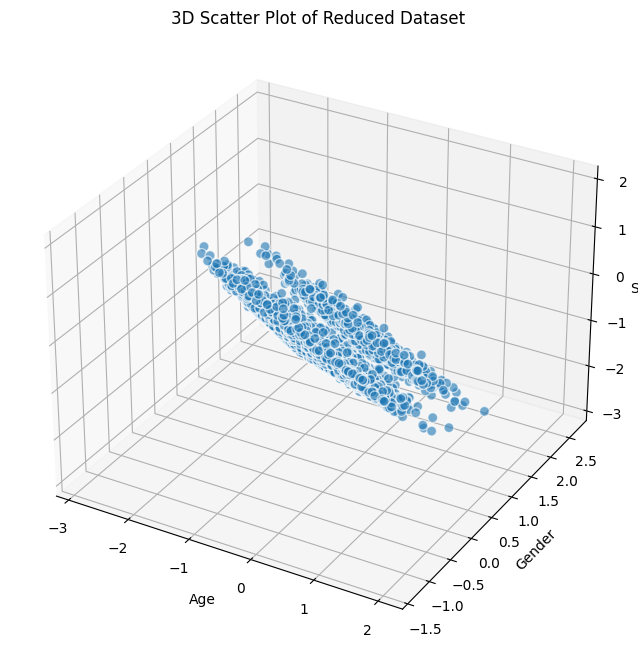

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Creating a 3D scatter plot for the reduced dataset

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using the three dimensions
scatter = ax.scatter(df_reduced_final_corrected['age'],
                     df_reduced_final_corrected['gender'],
                     df_reduced_final_corrected['spo2'],
                     alpha=0.6, edgecolors='w', s=50)

ax.set_title('3D Scatter Plot of Reduced Dataset')
ax.set_xlabel('Age')
ax.set_ylabel('Gender')
ax.set_zlabel('SPO2')
plt.show()


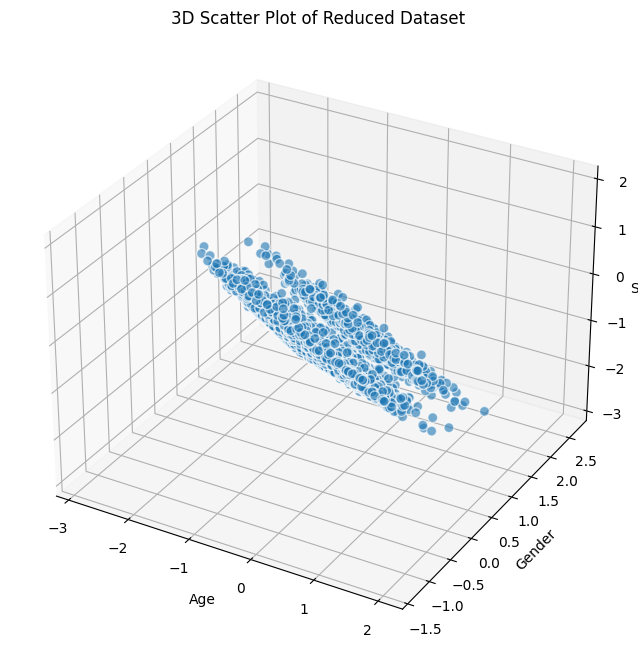

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Creating a 3D scatter plot for the reduced dataset

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using the three dimensions
scatter = ax.scatter(df_reduced_final_corrected['age'],
                     df_reduced_final_corrected['gender'],
                     df_reduced_final_corrected['spo2'],
                     alpha=0.6, edgecolors='w', s=50)

ax.set_title('3D Scatter Plot of Reduced Dataset')
ax.set_xlabel('Age')
ax.set_ylabel('Gender')
ax.set_zlabel('SPO2')
plt.show()
